<a href="https://colab.research.google.com/github/awhooshingwind/Math254_wp/blob/main/jpierson_wp1_suppl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Note: So, this started as a script in Matlab to verify my solutions and generate a graph plotting the two calculations (m=22 and m=28), then it turned into, well, something a little more.

In Math 220 (and I think Math 152) a certain wise professor suggested getting some programming experience. This seemed like good advice, so here we are. This is my first go at a Google Colab notebook, still learning Markdown and how to effectively format these - any advice or feedback will be much appreciated.

Intro

This report will explore simple economic modeling using the Cobb-Douglas production function. 





In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#Economic Modeling#

##Cobb-Douglas Production function##

$P = bL^\alpha K^{1-\alpha}$

constraint: $mL + nK = p$ 

max production when:

$K = \frac{p(1-\alpha)}{n}$

$L = \frac{\alpha p}{m}$

#Symbolic Derivation of K and L#

$$\nabla P = \lambda \nabla g$$


$$P_L = \lambda \ g_L \ →  \ \alpha b L^{\alpha -1} K^{1-\alpha} \ = \ \lambda (m) \  → \  \lambda = \  \frac{\alpha b L^{\alpha -1} K^
{1-\alpha}}{m}$$



$$P_K = \lambda g_K  \ → \  (1 -\alpha) \ b L^{\alpha} K^{-\alpha} \ = \ \lambda (n) \  →  \ \lambda = \frac{(1 -\alpha) b L^{\alpha} K^{-\alpha}}{n}$$  

Equate λ and cross multiply:  

$$ \frac{\alpha b L^{\alpha -1} K^{1-\alpha}}{m} \  = \ \frac{(1 -\alpha) \ b L^{\alpha} K^{-\alpha}}{n} \ \\ $$  
$$ n \ \alpha b L^{\alpha -1} K^{1-\alpha} \ = \ m \ (1 -\alpha) \ b L^{\alpha} K^{-\alpha} \ \\ $$  

Simply (divide by $ b L^{\alpha} K^{-\alpha}$):  
  
$$ \frac{n \alpha K}{L} \ = \ m \ (1 - \alpha) $$
  

Solve for n:  

$$ n \ = \frac{m \ (1 - \alpha) L}{\alpha K} $$  
  
Substitute into constraint equation:
$$ mL + \frac{m \ (1 - \alpha) L}{\alpha K} K = p $$  

Distribute, cancel, and solve for L:  

$$ L = \frac{\alpha p}{m} $$

Repeat above steps, solving $\frac{n \alpha K}{L} \ = \ m \ (1 - \alpha) $ for m:
  
  $$ m = \frac{ n \alpha K}{(1-\alpha)L} $$

  Substitute into constraint equation:  
  $$ \frac{ n \alpha K}{(1-\alpha)L} L + nK = p$$  

  Distribute, cancel, and solve for K:  
  $$ (p - nK)(1 - \alpha) = n \alpha K \ \\
  \ \\ K = \frac{ p (1-\alpha)}{n} $$

##Solution with given parameters:##

In [ ]:
# Assume:
a = 1/4;
b = 100;
n = 34;
p = 850000;

# def func
def P_func(L, K):
  return b*L**a *K**(1-a);

def K_func(n):
  return p*(1-a)/n;

K = K_func(n); # set K value

def L_func(m):
  return a*p/m;

# calc solutions
L1 = L_func(22);
L2 = L_func(28);
max1 = P_func(L1,K);
max2 = P_func(L2, K);

percent_change = (max1-max2)/max1
abs_change = max1-max2

# output results
out = f'Max P (m = $22): ${max1:,.2f}\nMax P (m = $28): ${max2:,.2f}\n\nPercent Change: {percent_change:.2%}\nAbsolute Change: ${abs_change:,.2f}'
print(out)

Max P (m = $22): $1,588,491.95
Max P (m = $28): $1,495,550.84

Percent Change: 5.85%
Absolute Change: $92,941.11


Some explanatory text


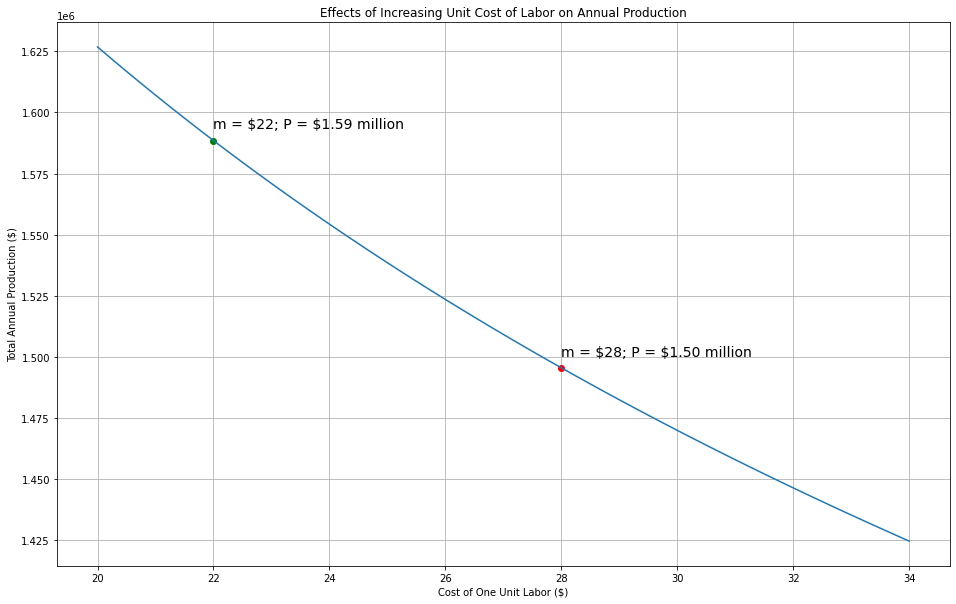

In [ ]:
# plot

# set interval
start = 20
stop = 34
step = 0.25
# generate values for plot
mvals = np.arange(start, stop+step, step)
Lplot = L_func(mvals)
Pplot = P_func(Lplot, K)
# create graph w/ labels
plt.figure(figsize=(16, 10))
plt.plot(22, max1, 'go', 28, max2, 'ro')
plt.plot(mvals, Pplot, '-')
plt.grid(True)
plt.title("Effects of Increasing Unit Cost of Labor on Annual Production")
plt.xlabel('Cost of One Unit Labor ($)')
plt.ylabel('Total Annual Production ($)')
plt.tight_layout
plt.annotate('m = \$22; P = $1.59 million',xy=(22,max1+5000),fontsize=14)
plt.annotate('m = \$28; P = $1.50 million',xy=(28,max2+5000),fontsize=14)
plt.show;


Conclusion

Playground notes:

I was curious how the system would respond to different values for the a and b parameters, so the following is an exploration of that using some level curves and contour maps

In [ ]:
# Playground

# different version of Cobb-Douglas (accepts all variables as parameters)
def cobb_doug(b,L, a, K):
  return b*L**a *K**(1-a);

# parameters for testing
m_test = 28
n_test = 34
b_test = 125
L_test = L_func(m_test)
a_test = 1/4
K_test = K_func(n_test)

# output
max_test = cobb_doug(b_test, L_test, a_test, K_test)
test_out = f'Max P: ${max_test:,.2f}'
print(test_out)

Max P: $1,869,438.54


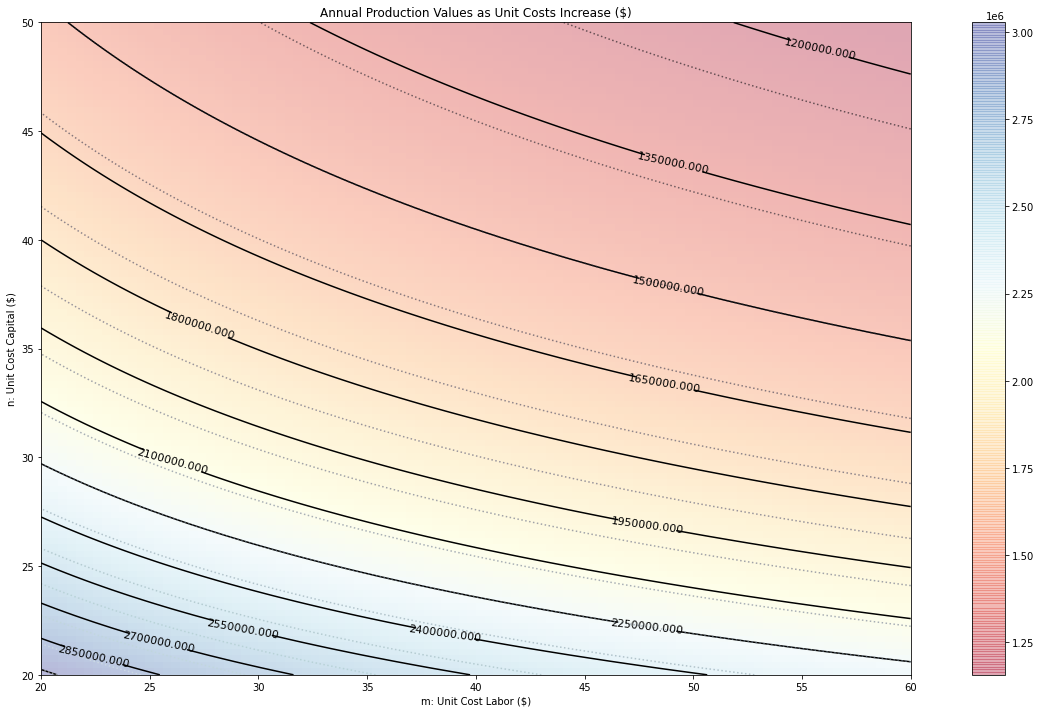

In [131]:
# Playground Pt 2 (level map)

# Let x represent m and y represent n
# Parameters (for easier adjusting)
x_min = 20
x_max = 60
y_min = 20
y_max = 50
sample = 100

# Level map
x = np.linspace(x_min, x_max, sample)
y = np.linspace(y_min, y_max, sample)
X, Y = np.meshgrid(x, y)

L_level = L_func(X)
K_level = K_func(Y)

# Let Z represent P
# adjusted values
Z = cobb_doug(b_test, L_level, a_test, K_level)
Z = np.array(Z)
# original parameters
Z0 = cobb_doug(b, L_level, a, K_level)
Z0 = np.array(Z0)

# Plots w/ labels
plt.figure(figsize = (22,12))
contours = plt.contour(X, Y, Z, 14, colors='black')
plt.clabel(contours, inline=True, fontsize=11)
plt.imshow(Z, extent=[x[0], x[-1], y[0], y[-1]], origin='lower',
           cmap='RdYlBu', alpha=0.35)
plt.xlabel('m: Unit Cost Labor ($)')
plt.ylabel('n: Unit Cost Capital ($)')
plt.title('Annual Production Values as Unit Costs Increase ($)')
plt.colorbar();

# overlay levels using given a and b parameters (dotted)
plt.contour(X, Y, Z0, 14,cmap="bone", linestyles='dotted', alpha=0.6)
plt.show()

Final comments